In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.calibration import calibration_curve

# Модель для кредитных карт (звонки)

In [73]:
train_df = pd.read_csv('marketing_optimization_data/credit_card_call_train.csv')
test_df = pd.read_csv('marketing_optimization_data/credit_card_call_oot.csv')

In [6]:
train_df.tail()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,target
79995,-3.281613,-4.137495,6.653706,-3.411775,0.673699,-1.903512,0.603855,-1.054111,0.289944,-0.404494,...,-0.485515,-0.029031,1.281206,4.423422,-1.453784,1.424668,4.600384,0.567404,2.153608,0
79996,-4.955940,3.183614,2.727406,4.220248,-0.873593,1.240163,-1.359687,-0.727583,0.887815,1.295367,...,2.814635,-0.849517,-1.209367,-1.841456,-1.046425,-3.798071,-0.863522,5.938198,2.664172,0
79997,-0.010466,-3.466391,0.812313,-0.104268,-4.336378,-2.019410,-0.417223,-0.013536,0.657430,1.167832,...,0.401937,1.568553,-0.049866,2.982577,-1.299870,2.395425,1.357134,-6.522081,-5.272503,0
79998,-3.503711,0.897145,-0.435501,0.402223,6.646078,-2.292174,-0.871117,-0.612262,0.424350,-1.003419,...,-1.676718,0.955636,-0.906329,2.185733,-0.025683,-0.138173,-1.498282,5.464490,-1.118441,0
79999,1.688294,-0.376143,-4.669034,-1.783743,2.950516,3.243213,0.571332,-1.330199,-0.219057,-4.860088,...,3.518152,0.402505,1.266253,-8.336806,-0.210869,2.518081,2.241812,-13.381004,4.095062,0


In [74]:
X_train, y_train = train_df.drop(['target'], axis=1), train_df['target']
X_test, y_test = test_df.drop(['target'], axis=1), test_df['target']

In [75]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print(classification_report(y_test, y_pred := lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18506
           1       0.90      0.48      0.63      1494

    accuracy                           0.96     20000
   macro avg       0.93      0.74      0.80     20000
weighted avg       0.95      0.96      0.95     20000



In [76]:
roc_auc_score(y_test, y_probs := lr_model.predict_proba(X_test)[:, 1])

0.8922987240579451

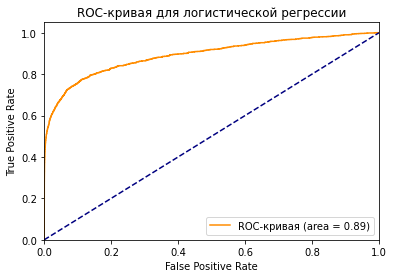

In [77]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.show()

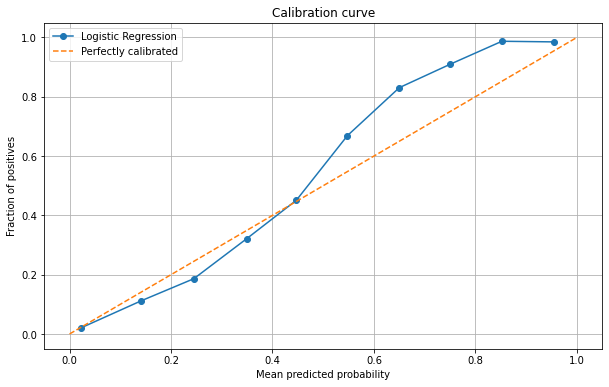

In [86]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [81]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18506
           1       0.99      0.32      0.48      1494

    accuracy                           0.95     20000
   macro avg       0.97      0.66      0.73     20000
weighted avg       0.95      0.95      0.94     20000



In [87]:
roc_auc_score(y_test, y_probs := rf_model.predict_proba(X_test)[:, 1])

0.9457494772490299

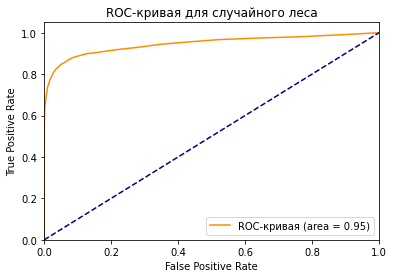

In [88]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для случайного леса')
plt.legend(loc="lower right")
plt.show()

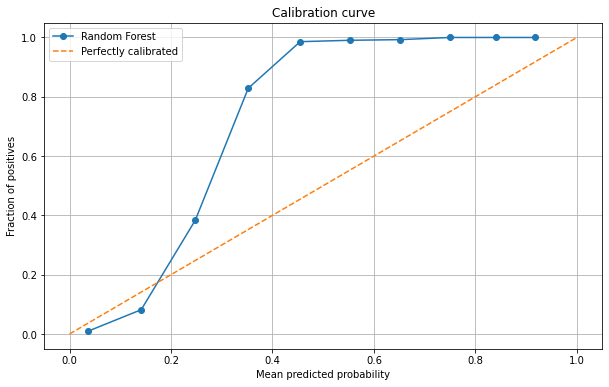

In [89]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [83]:
catboost_model = CatBoostClassifier(task_type='GPU')
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)
catboost_model.fit(X_train, y_train, plot=True, plot_file='CatBoostRegressor.html', use_best_model=True)
print(classification_report(y_test, catboost_model.predict(X_test)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.026491
0:	learn: 0.6576840	total: 22.1ms	remaining: 22.1s
1:	learn: 0.6250185	total: 33.5ms	remaining: 16.7s
2:	learn: 0.5942823	total: 45ms	remaining: 15s
3:	learn: 0.5665583	total: 57.3ms	remaining: 14.3s
4:	learn: 0.5395399	total: 68.2ms	remaining: 13.6s
5:	learn: 0.5148445	total: 79.4ms	remaining: 13.2s
6:	learn: 0.4916677	total: 92.1ms	remaining: 13.1s
7:	learn: 0.4711622	total: 103ms	remaining: 12.8s
8:	learn: 0.4517669	total: 114ms	remaining: 12.5s
9:	learn: 0.4350802	total: 124ms	remaining: 12.3s
10:	learn: 0.4188981	total: 135ms	remaining: 12.1s
11:	learn: 0.4033605	total: 148ms	remaining: 12.2s
12:	learn: 0.3890076	total: 161ms	remaining: 12.2s
13:	learn: 0.3763116	total: 173ms	remaining: 12.2s
14:	learn: 0.3633304	total: 186ms	remaining: 12.2s
15:	learn: 0.3517238	total: 198ms	remaining: 12.2s
16:	learn: 0.3404905	total: 210ms	remaining: 12.1s
17:	learn: 0.3305707	total: 221ms	remaining: 12s
18:	learn: 0.3213935	total: 231ms	remaining: 12s
19:	learn: 0

174:	learn: 0.1275232	total: 2.51s	remaining: 11.8s
175:	learn: 0.1271952	total: 2.52s	remaining: 11.8s
176:	learn: 0.1268828	total: 2.53s	remaining: 11.8s
177:	learn: 0.1265729	total: 2.55s	remaining: 11.8s
178:	learn: 0.1262753	total: 2.56s	remaining: 11.8s
179:	learn: 0.1259899	total: 2.58s	remaining: 11.7s
180:	learn: 0.1257622	total: 2.59s	remaining: 11.7s
181:	learn: 0.1254728	total: 2.6s	remaining: 11.7s
182:	learn: 0.1251834	total: 2.61s	remaining: 11.7s
183:	learn: 0.1248572	total: 2.63s	remaining: 11.7s
184:	learn: 0.1246388	total: 2.64s	remaining: 11.6s
185:	learn: 0.1243432	total: 2.65s	remaining: 11.6s
186:	learn: 0.1241278	total: 2.67s	remaining: 11.6s
187:	learn: 0.1238834	total: 2.68s	remaining: 11.6s
188:	learn: 0.1236179	total: 2.69s	remaining: 11.6s
189:	learn: 0.1233567	total: 2.71s	remaining: 11.6s
190:	learn: 0.1230408	total: 2.73s	remaining: 11.5s
191:	learn: 0.1228038	total: 2.74s	remaining: 11.5s
192:	learn: 0.1224841	total: 2.75s	remaining: 11.5s
193:	learn: 0

338:	learn: 0.0958476	total: 5.04s	remaining: 9.82s
339:	learn: 0.0957301	total: 5.06s	remaining: 9.82s
340:	learn: 0.0956278	total: 5.08s	remaining: 9.81s
341:	learn: 0.0954609	total: 5.09s	remaining: 9.8s
342:	learn: 0.0953250	total: 5.11s	remaining: 9.79s
343:	learn: 0.0952036	total: 5.13s	remaining: 9.78s
344:	learn: 0.0950658	total: 5.14s	remaining: 9.76s
345:	learn: 0.0949163	total: 5.16s	remaining: 9.75s
346:	learn: 0.0947773	total: 5.17s	remaining: 9.73s
347:	learn: 0.0946214	total: 5.18s	remaining: 9.71s
348:	learn: 0.0944831	total: 5.2s	remaining: 9.7s
349:	learn: 0.0943559	total: 5.21s	remaining: 9.68s
350:	learn: 0.0942347	total: 5.23s	remaining: 9.66s
351:	learn: 0.0940811	total: 5.24s	remaining: 9.65s
352:	learn: 0.0939722	total: 5.25s	remaining: 9.63s
353:	learn: 0.0938562	total: 5.27s	remaining: 9.61s
354:	learn: 0.0937546	total: 5.28s	remaining: 9.6s
355:	learn: 0.0936133	total: 5.29s	remaining: 9.58s
356:	learn: 0.0934710	total: 5.31s	remaining: 9.56s
357:	learn: 0.09

498:	learn: 0.0793850	total: 7.17s	remaining: 7.19s
499:	learn: 0.0793302	total: 7.18s	remaining: 7.18s
500:	learn: 0.0792658	total: 7.19s	remaining: 7.16s
501:	learn: 0.0791877	total: 7.2s	remaining: 7.14s
502:	learn: 0.0791301	total: 7.21s	remaining: 7.13s
503:	learn: 0.0790413	total: 7.22s	remaining: 7.11s
504:	learn: 0.0789600	total: 7.24s	remaining: 7.09s
505:	learn: 0.0788611	total: 7.25s	remaining: 7.08s
506:	learn: 0.0787819	total: 7.26s	remaining: 7.06s
507:	learn: 0.0787002	total: 7.28s	remaining: 7.05s
508:	learn: 0.0786099	total: 7.29s	remaining: 7.03s
509:	learn: 0.0785208	total: 7.3s	remaining: 7.02s
510:	learn: 0.0784261	total: 7.32s	remaining: 7s
511:	learn: 0.0783369	total: 7.33s	remaining: 6.99s
512:	learn: 0.0782713	total: 7.35s	remaining: 6.97s
513:	learn: 0.0782028	total: 7.36s	remaining: 6.96s
514:	learn: 0.0781722	total: 7.38s	remaining: 6.95s
515:	learn: 0.0780947	total: 7.39s	remaining: 6.93s
516:	learn: 0.0780020	total: 7.4s	remaining: 6.92s
517:	learn: 0.0779

669:	learn: 0.0692368	total: 9.47s	remaining: 4.66s
670:	learn: 0.0691685	total: 9.48s	remaining: 4.65s
671:	learn: 0.0691238	total: 9.5s	remaining: 4.63s
672:	learn: 0.0690722	total: 9.51s	remaining: 4.62s
673:	learn: 0.0690345	total: 9.52s	remaining: 4.61s
674:	learn: 0.0689795	total: 9.54s	remaining: 4.59s
675:	learn: 0.0689638	total: 9.55s	remaining: 4.58s
676:	learn: 0.0688939	total: 9.56s	remaining: 4.56s
677:	learn: 0.0688519	total: 9.58s	remaining: 4.55s
678:	learn: 0.0688114	total: 9.59s	remaining: 4.53s
679:	learn: 0.0687420	total: 9.6s	remaining: 4.52s
680:	learn: 0.0687074	total: 9.62s	remaining: 4.5s
681:	learn: 0.0686683	total: 9.63s	remaining: 4.49s
682:	learn: 0.0685937	total: 9.64s	remaining: 4.47s
683:	learn: 0.0685474	total: 9.65s	remaining: 4.46s
684:	learn: 0.0685057	total: 9.67s	remaining: 4.45s
685:	learn: 0.0684516	total: 9.68s	remaining: 4.43s
686:	learn: 0.0684302	total: 9.7s	remaining: 4.42s
687:	learn: 0.0683685	total: 9.71s	remaining: 4.4s
688:	learn: 0.068

830:	learn: 0.0631760	total: 11.9s	remaining: 2.42s
831:	learn: 0.0631531	total: 11.9s	remaining: 2.4s
832:	learn: 0.0631391	total: 11.9s	remaining: 2.39s
833:	learn: 0.0630998	total: 11.9s	remaining: 2.37s
834:	learn: 0.0630654	total: 11.9s	remaining: 2.36s
835:	learn: 0.0630269	total: 12s	remaining: 2.35s
836:	learn: 0.0630139	total: 12s	remaining: 2.33s
837:	learn: 0.0629644	total: 12s	remaining: 2.32s
838:	learn: 0.0629002	total: 12s	remaining: 2.31s
839:	learn: 0.0628555	total: 12s	remaining: 2.29s
840:	learn: 0.0628303	total: 12.1s	remaining: 2.28s
841:	learn: 0.0627996	total: 12.1s	remaining: 2.27s
842:	learn: 0.0627782	total: 12.1s	remaining: 2.25s
843:	learn: 0.0627692	total: 12.1s	remaining: 2.24s
844:	learn: 0.0627378	total: 12.1s	remaining: 2.23s
845:	learn: 0.0627093	total: 12.2s	remaining: 2.21s
846:	learn: 0.0626884	total: 12.2s	remaining: 2.2s
847:	learn: 0.0626523	total: 12.2s	remaining: 2.19s
848:	learn: 0.0626076	total: 12.2s	remaining: 2.17s
849:	learn: 0.0625978	to

993:	learn: 0.0591170	total: 14.2s	remaining: 85.9ms
994:	learn: 0.0590816	total: 14.2s	remaining: 71.6ms
995:	learn: 0.0590707	total: 14.3s	remaining: 57.3ms
996:	learn: 0.0590272	total: 14.3s	remaining: 43ms
997:	learn: 0.0590192	total: 14.3s	remaining: 28.6ms
998:	learn: 0.0590109	total: 14.3s	remaining: 14.3ms
999:	learn: 0.0589884	total: 14.3s	remaining: 0us
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18506
           1       0.99      0.74      0.85      1494

    accuracy                           0.98     20000
   macro avg       0.98      0.87      0.92     20000
weighted avg       0.98      0.98      0.98     20000



In [90]:
roc_auc_score(y_test, y_probs := catboost_model.predict_proba(X_test)[:, 1])

0.9593575136310217

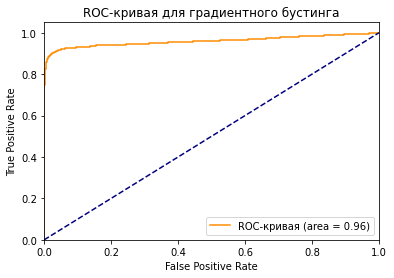

In [91]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для градиентного бустинга')
plt.legend(loc="lower right")
plt.show()

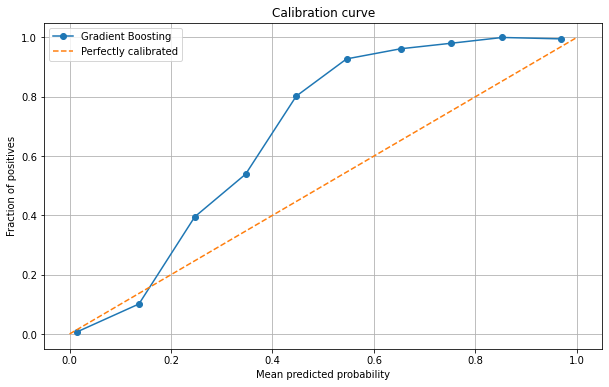

In [92]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

# Модель для кредитных карт (СМС)

In [93]:
train_df = pd.read_csv('marketing_optimization_data/credit_card_sms_train.csv')
test_df = pd.read_csv('marketing_optimization_data/credit_card_sms_oot.csv')

In [94]:
X_train, y_train = train_df.drop(['target'], axis=1), train_df['target']
X_test, y_test = test_df.drop(['target'], axis=1), test_df['target']

In [95]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19107
           1       0.88      0.48      0.62       893

    accuracy                           0.97     20000
   macro avg       0.93      0.74      0.80     20000
weighted avg       0.97      0.97      0.97     20000



In [96]:
roc_auc_score(y_test, y_probs := lr_model.predict_proba(X_test)[:, 1])

0.9122917200364706

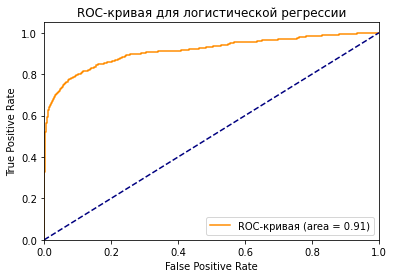

In [97]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.show()

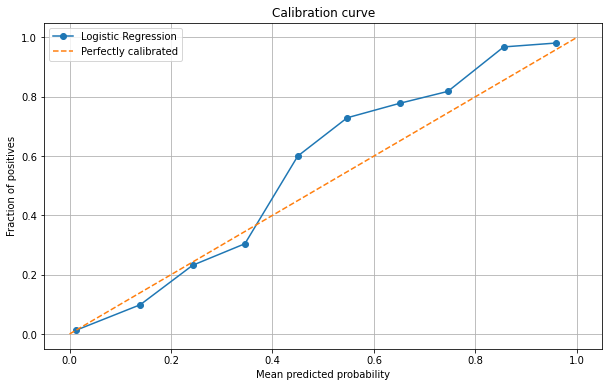

In [98]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [99]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19107
           1       1.00      0.23      0.38       893

    accuracy                           0.97     20000
   macro avg       0.98      0.62      0.68     20000
weighted avg       0.97      0.97      0.96     20000



In [100]:
roc_auc_score(y_test, y_probs := rf_model.predict_proba(X_test)[:, 1])

0.928583363648261

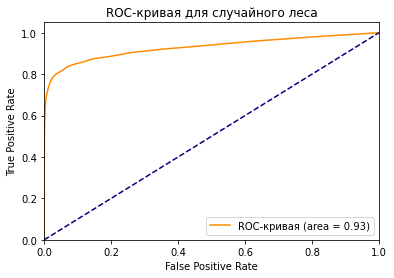

In [101]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для случайного леса')
plt.legend(loc="lower right")
plt.show()

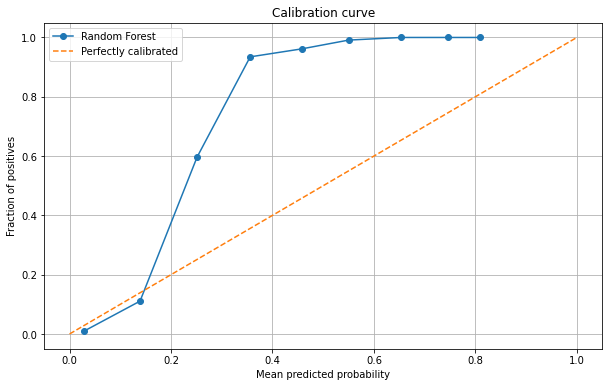

In [102]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [103]:
catboost_model = CatBoostClassifier(task_type='GPU')
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)
catboost_model.fit(X_train, y_train, plot=True, plot_file='CatBoostRegressor.html', use_best_model=False)
print(classification_report(y_test, catboost_model.predict(X_test)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.026491
0:	learn: 0.6502895	total: 20.9ms	remaining: 20.9s
1:	learn: 0.6092605	total: 37.4ms	remaining: 18.7s
2:	learn: 0.5730074	total: 54.1ms	remaining: 18s
3:	learn: 0.5393176	total: 70.7ms	remaining: 17.6s
4:	learn: 0.5086428	total: 87.7ms	remaining: 17.5s
5:	learn: 0.4811806	total: 104ms	remaining: 17.3s
6:	learn: 0.4554455	total: 122ms	remaining: 17.4s
7:	learn: 0.4314065	total: 141ms	remaining: 17.5s
8:	learn: 0.4084691	total: 155ms	remaining: 17.1s
9:	learn: 0.3888275	total: 170ms	remaining: 16.8s
10:	learn: 0.3690198	total: 183ms	remaining: 16.5s
11:	learn: 0.3507476	total: 198ms	remaining: 16.3s
12:	learn: 0.3349290	total: 212ms	remaining: 16.1s
13:	learn: 0.3198464	total: 228ms	remaining: 16.1s
14:	learn: 0.3064564	total: 245ms	remaining: 16.1s
15:	learn: 0.2936717	total: 260ms	remaining: 16s
16:	learn: 0.2823539	total: 273ms	remaining: 15.8s
17:	learn: 0.2715162	total: 288ms	remaining: 15.7s
18:	learn: 0.2609522	total: 302ms	remaining: 15.6s
19:	learn:

165:	learn: 0.0856672	total: 2.47s	remaining: 12.4s
166:	learn: 0.0854518	total: 2.48s	remaining: 12.4s
167:	learn: 0.0852861	total: 2.5s	remaining: 12.4s
168:	learn: 0.0850864	total: 2.52s	remaining: 12.4s
169:	learn: 0.0848662	total: 2.54s	remaining: 12.4s
170:	learn: 0.0846769	total: 2.55s	remaining: 12.4s
171:	learn: 0.0844899	total: 2.57s	remaining: 12.4s
172:	learn: 0.0842792	total: 2.59s	remaining: 12.4s
173:	learn: 0.0840957	total: 2.6s	remaining: 12.4s
174:	learn: 0.0838766	total: 2.63s	remaining: 12.4s
175:	learn: 0.0836445	total: 2.64s	remaining: 12.4s
176:	learn: 0.0834342	total: 2.66s	remaining: 12.4s
177:	learn: 0.0832334	total: 2.67s	remaining: 12.3s
178:	learn: 0.0830633	total: 2.69s	remaining: 12.3s
179:	learn: 0.0828580	total: 2.7s	remaining: 12.3s
180:	learn: 0.0826626	total: 2.71s	remaining: 12.3s
181:	learn: 0.0824644	total: 2.73s	remaining: 12.3s
182:	learn: 0.0822723	total: 2.74s	remaining: 12.2s
183:	learn: 0.0820937	total: 2.76s	remaining: 12.2s
184:	learn: 0.0

325:	learn: 0.0653451	total: 4.79s	remaining: 9.9s
326:	learn: 0.0652578	total: 4.81s	remaining: 9.9s
327:	learn: 0.0651730	total: 4.83s	remaining: 9.89s
328:	learn: 0.0650882	total: 4.84s	remaining: 9.88s
329:	learn: 0.0649879	total: 4.86s	remaining: 9.86s
330:	learn: 0.0648801	total: 4.87s	remaining: 9.85s
331:	learn: 0.0647688	total: 4.89s	remaining: 9.83s
332:	learn: 0.0646896	total: 4.91s	remaining: 9.82s
333:	learn: 0.0646054	total: 4.92s	remaining: 9.82s
334:	learn: 0.0645265	total: 4.94s	remaining: 9.81s
335:	learn: 0.0644574	total: 4.96s	remaining: 9.8s
336:	learn: 0.0643846	total: 4.98s	remaining: 9.8s
337:	learn: 0.0642947	total: 5s	remaining: 9.79s
338:	learn: 0.0642277	total: 5.02s	remaining: 9.78s
339:	learn: 0.0641455	total: 5.03s	remaining: 9.77s
340:	learn: 0.0640636	total: 5.05s	remaining: 9.76s
341:	learn: 0.0639678	total: 5.07s	remaining: 9.75s
342:	learn: 0.0638973	total: 5.09s	remaining: 9.74s
343:	learn: 0.0638359	total: 5.1s	remaining: 9.73s
344:	learn: 0.063743

486:	learn: 0.0556856	total: 7.1s	remaining: 7.48s
487:	learn: 0.0556670	total: 7.11s	remaining: 7.46s
488:	learn: 0.0556125	total: 7.13s	remaining: 7.45s
489:	learn: 0.0556047	total: 7.14s	remaining: 7.43s
490:	learn: 0.0555516	total: 7.15s	remaining: 7.41s
491:	learn: 0.0555349	total: 7.17s	remaining: 7.4s
492:	learn: 0.0554909	total: 7.18s	remaining: 7.38s
493:	learn: 0.0554180	total: 7.2s	remaining: 7.37s
494:	learn: 0.0553483	total: 7.21s	remaining: 7.36s
495:	learn: 0.0552926	total: 7.22s	remaining: 7.34s
496:	learn: 0.0552536	total: 7.24s	remaining: 7.33s
497:	learn: 0.0552324	total: 7.25s	remaining: 7.31s
498:	learn: 0.0552169	total: 7.27s	remaining: 7.3s
499:	learn: 0.0552052	total: 7.28s	remaining: 7.28s
500:	learn: 0.0551415	total: 7.29s	remaining: 7.26s
501:	learn: 0.0551022	total: 7.31s	remaining: 7.25s
502:	learn: 0.0550738	total: 7.32s	remaining: 7.24s
503:	learn: 0.0550234	total: 7.34s	remaining: 7.22s
504:	learn: 0.0549728	total: 7.35s	remaining: 7.21s
505:	learn: 0.05

654:	learn: 0.0500175	total: 9.38s	remaining: 4.94s
655:	learn: 0.0499702	total: 9.4s	remaining: 4.93s
656:	learn: 0.0499600	total: 9.41s	remaining: 4.91s
657:	learn: 0.0499452	total: 9.43s	remaining: 4.9s
658:	learn: 0.0499213	total: 9.44s	remaining: 4.88s
659:	learn: 0.0499109	total: 9.45s	remaining: 4.87s
660:	learn: 0.0498904	total: 9.47s	remaining: 4.86s
661:	learn: 0.0498591	total: 9.48s	remaining: 4.84s
662:	learn: 0.0498207	total: 9.49s	remaining: 4.83s
663:	learn: 0.0498041	total: 9.51s	remaining: 4.81s
664:	learn: 0.0497830	total: 9.52s	remaining: 4.8s
665:	learn: 0.0497648	total: 9.54s	remaining: 4.78s
666:	learn: 0.0497004	total: 9.55s	remaining: 4.77s
667:	learn: 0.0496727	total: 9.56s	remaining: 4.75s
668:	learn: 0.0496591	total: 9.57s	remaining: 4.74s
669:	learn: 0.0496231	total: 9.59s	remaining: 4.72s
670:	learn: 0.0495952	total: 9.6s	remaining: 4.71s
671:	learn: 0.0495839	total: 9.61s	remaining: 4.69s
672:	learn: 0.0495731	total: 9.62s	remaining: 4.68s
673:	learn: 0.04

815:	learn: 0.0465490	total: 11.5s	remaining: 2.59s
816:	learn: 0.0465376	total: 11.5s	remaining: 2.58s
817:	learn: 0.0465204	total: 11.5s	remaining: 2.56s
818:	learn: 0.0464862	total: 11.5s	remaining: 2.55s
819:	learn: 0.0464741	total: 11.5s	remaining: 2.53s
820:	learn: 0.0464593	total: 11.6s	remaining: 2.52s
821:	learn: 0.0464429	total: 11.6s	remaining: 2.5s
822:	learn: 0.0464275	total: 11.6s	remaining: 2.49s
823:	learn: 0.0463989	total: 11.6s	remaining: 2.48s
824:	learn: 0.0463851	total: 11.6s	remaining: 2.46s
825:	learn: 0.0463657	total: 11.6s	remaining: 2.45s
826:	learn: 0.0463182	total: 11.6s	remaining: 2.43s
827:	learn: 0.0463109	total: 11.6s	remaining: 2.42s
828:	learn: 0.0463003	total: 11.7s	remaining: 2.4s
829:	learn: 0.0462787	total: 11.7s	remaining: 2.39s
830:	learn: 0.0462720	total: 11.7s	remaining: 2.38s
831:	learn: 0.0462532	total: 11.7s	remaining: 2.36s
832:	learn: 0.0462377	total: 11.7s	remaining: 2.35s
833:	learn: 0.0462150	total: 11.7s	remaining: 2.33s
834:	learn: 0.

974:	learn: 0.0438639	total: 13.6s	remaining: 349ms
975:	learn: 0.0438363	total: 13.6s	remaining: 335ms
976:	learn: 0.0438007	total: 13.6s	remaining: 321ms
977:	learn: 0.0437846	total: 13.6s	remaining: 307ms
978:	learn: 0.0437768	total: 13.7s	remaining: 293ms
979:	learn: 0.0437536	total: 13.7s	remaining: 279ms
980:	learn: 0.0437345	total: 13.7s	remaining: 265ms
981:	learn: 0.0437078	total: 13.7s	remaining: 251ms
982:	learn: 0.0436938	total: 13.7s	remaining: 237ms
983:	learn: 0.0436851	total: 13.7s	remaining: 223ms
984:	learn: 0.0436743	total: 13.7s	remaining: 209ms
985:	learn: 0.0436656	total: 13.7s	remaining: 195ms
986:	learn: 0.0436474	total: 13.8s	remaining: 181ms
987:	learn: 0.0436284	total: 13.8s	remaining: 167ms
988:	learn: 0.0436155	total: 13.8s	remaining: 153ms
989:	learn: 0.0436038	total: 13.8s	remaining: 139ms
990:	learn: 0.0435689	total: 13.8s	remaining: 125ms
991:	learn: 0.0435593	total: 13.8s	remaining: 112ms
992:	learn: 0.0435510	total: 13.8s	remaining: 97.6ms
993:	learn:

In [104]:
roc_auc_score(y_test, y_probs := catboost_model.predict_proba(X_test)[:, 1])

0.9467409064447632

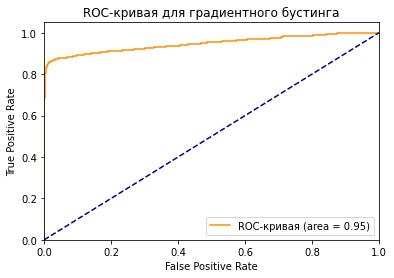

In [105]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для градиентного бустинга')
plt.legend(loc="lower right")
plt.show()

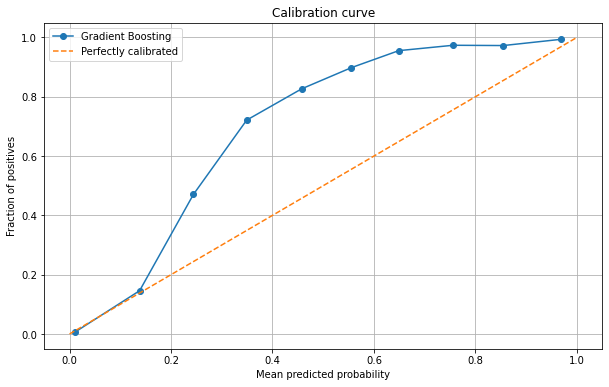

In [106]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

# Модель для кредитов (звонки)

In [107]:
train_df = pd.read_csv('marketing_optimization_data/credit_call_train.csv')
test_df = pd.read_csv('marketing_optimization_data/credit_call_oot.csv')

In [108]:
X_train, y_train = train_df.drop(['target'], axis=1), train_df['target']
X_test, y_test = test_df.drop(['target'], axis=1), test_df['target']

In [109]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18909
           1       0.85      0.50      0.63      1091

    accuracy                           0.97     20000
   macro avg       0.91      0.75      0.81     20000
weighted avg       0.97      0.97      0.96     20000



In [110]:
roc_auc_score(y_test, y_probs := lr_model.predict_proba(X_test)[:, 1])

0.9143759059442351

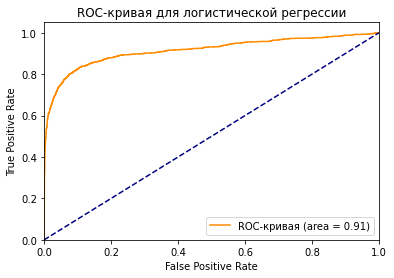

In [111]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.show()

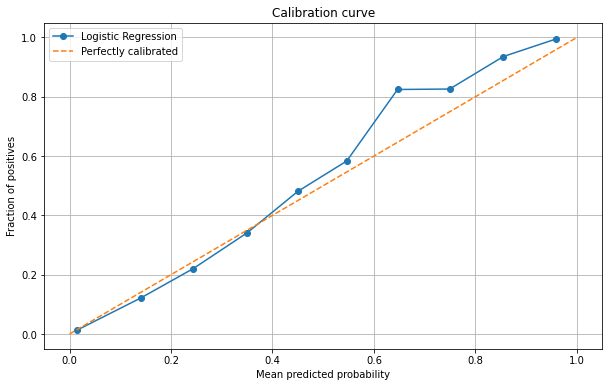

In [112]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [113]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18909
           1       1.00      0.19      0.32      1091

    accuracy                           0.96     20000
   macro avg       0.98      0.60      0.65     20000
weighted avg       0.96      0.96      0.94     20000



In [114]:
roc_auc_score(y_test, y_probs := rf_model.predict_proba(X_test)[:, 1])

0.9422909977591066

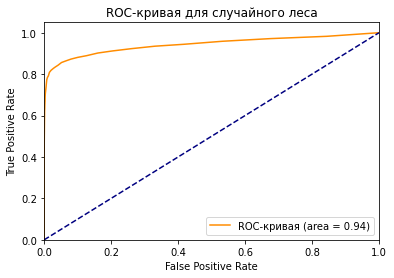

In [115]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для случайного леса')
plt.legend(loc="lower right")
plt.show()

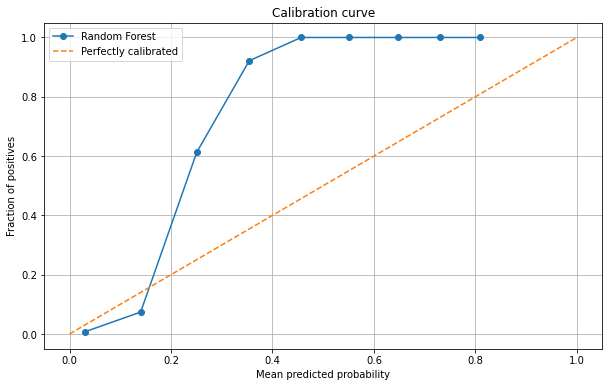

In [116]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [117]:
catboost_model = CatBoostClassifier(task_type='GPU')
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)
catboost_model.fit(X_train, y_train, plot=True, plot_file='CatBoostRegressor.html', use_best_model=False)
print(classification_report(y_test, catboost_model.predict(X_test)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.026491
0:	learn: 0.6540273	total: 15.6ms	remaining: 15.6s
1:	learn: 0.6182950	total: 29.3ms	remaining: 14.6s
2:	learn: 0.5862362	total: 44.2ms	remaining: 14.7s
3:	learn: 0.5563329	total: 58.5ms	remaining: 14.6s
4:	learn: 0.5278913	total: 72.5ms	remaining: 14.4s
5:	learn: 0.5008811	total: 84.6ms	remaining: 14s
6:	learn: 0.4764902	total: 96.1ms	remaining: 13.6s
7:	learn: 0.4548744	total: 107ms	remaining: 13.3s
8:	learn: 0.4342374	total: 119ms	remaining: 13.1s
9:	learn: 0.4153292	total: 130ms	remaining: 12.8s
10:	learn: 0.3980432	total: 142ms	remaining: 12.7s
11:	learn: 0.3813084	total: 155ms	remaining: 12.8s
12:	learn: 0.3662799	total: 167ms	remaining: 12.6s
13:	learn: 0.3517158	total: 179ms	remaining: 12.6s
14:	learn: 0.3392120	total: 190ms	remaining: 12.5s
15:	learn: 0.3280238	total: 202ms	remaining: 12.4s
16:	learn: 0.3169344	total: 214ms	remaining: 12.4s
17:	learn: 0.3072838	total: 226ms	remaining: 12.3s
18:	learn: 0.2969459	total: 240ms	remaining: 12.4s
19:	le

165:	learn: 0.1090363	total: 2.4s	remaining: 12s
166:	learn: 0.1087849	total: 2.41s	remaining: 12s
167:	learn: 0.1084680	total: 2.42s	remaining: 12s
168:	learn: 0.1081700	total: 2.44s	remaining: 12s
169:	learn: 0.1079630	total: 2.45s	remaining: 12s
170:	learn: 0.1077311	total: 2.46s	remaining: 12s
171:	learn: 0.1074980	total: 2.48s	remaining: 11.9s
172:	learn: 0.1072219	total: 2.49s	remaining: 11.9s
173:	learn: 0.1069098	total: 2.5s	remaining: 11.9s
174:	learn: 0.1066573	total: 2.52s	remaining: 11.9s
175:	learn: 0.1064375	total: 2.54s	remaining: 11.9s
176:	learn: 0.1060281	total: 2.56s	remaining: 11.9s
177:	learn: 0.1057531	total: 2.58s	remaining: 11.9s
178:	learn: 0.1055340	total: 2.59s	remaining: 11.9s
179:	learn: 0.1052273	total: 2.61s	remaining: 11.9s
180:	learn: 0.1049924	total: 2.63s	remaining: 11.9s
181:	learn: 0.1047875	total: 2.64s	remaining: 11.9s
182:	learn: 0.1045088	total: 2.66s	remaining: 11.9s
183:	learn: 0.1042745	total: 2.68s	remaining: 11.9s
184:	learn: 0.1039988	tota

336:	learn: 0.0781748	total: 4.94s	remaining: 9.73s
337:	learn: 0.0780261	total: 4.96s	remaining: 9.71s
338:	learn: 0.0779149	total: 4.98s	remaining: 9.7s
339:	learn: 0.0778017	total: 4.99s	remaining: 9.69s
340:	learn: 0.0776988	total: 5.01s	remaining: 9.68s
341:	learn: 0.0775933	total: 5.02s	remaining: 9.66s
342:	learn: 0.0774876	total: 5.04s	remaining: 9.65s
343:	learn: 0.0773758	total: 5.05s	remaining: 9.63s
344:	learn: 0.0772650	total: 5.06s	remaining: 9.61s
345:	learn: 0.0771569	total: 5.08s	remaining: 9.6s
346:	learn: 0.0770661	total: 5.09s	remaining: 9.58s
347:	learn: 0.0769419	total: 5.11s	remaining: 9.57s
348:	learn: 0.0768374	total: 5.12s	remaining: 9.55s
349:	learn: 0.0767608	total: 5.13s	remaining: 9.54s
350:	learn: 0.0766614	total: 5.15s	remaining: 9.52s
351:	learn: 0.0765383	total: 5.17s	remaining: 9.51s
352:	learn: 0.0764292	total: 5.18s	remaining: 9.49s
353:	learn: 0.0763147	total: 5.2s	remaining: 9.48s
354:	learn: 0.0761891	total: 5.21s	remaining: 9.47s
355:	learn: 0.0

505:	learn: 0.0631087	total: 7.47s	remaining: 7.29s
506:	learn: 0.0630522	total: 7.48s	remaining: 7.28s
507:	learn: 0.0629511	total: 7.5s	remaining: 7.26s
508:	learn: 0.0629178	total: 7.52s	remaining: 7.25s
509:	learn: 0.0628571	total: 7.53s	remaining: 7.24s
510:	learn: 0.0627790	total: 7.55s	remaining: 7.22s
511:	learn: 0.0627042	total: 7.56s	remaining: 7.21s
512:	learn: 0.0626499	total: 7.58s	remaining: 7.19s
513:	learn: 0.0626159	total: 7.59s	remaining: 7.18s
514:	learn: 0.0625376	total: 7.61s	remaining: 7.17s
515:	learn: 0.0624641	total: 7.63s	remaining: 7.15s
516:	learn: 0.0623925	total: 7.64s	remaining: 7.14s
517:	learn: 0.0623293	total: 7.66s	remaining: 7.13s
518:	learn: 0.0622484	total: 7.68s	remaining: 7.12s
519:	learn: 0.0621792	total: 7.7s	remaining: 7.11s
520:	learn: 0.0621249	total: 7.71s	remaining: 7.09s
521:	learn: 0.0620505	total: 7.73s	remaining: 7.08s
522:	learn: 0.0619970	total: 7.75s	remaining: 7.07s
523:	learn: 0.0619166	total: 7.76s	remaining: 7.05s
524:	learn: 0.

669:	learn: 0.0551078	total: 10.2s	remaining: 5.04s
670:	learn: 0.0550865	total: 10.3s	remaining: 5.03s
671:	learn: 0.0550518	total: 10.3s	remaining: 5.01s
672:	learn: 0.0550244	total: 10.3s	remaining: 5s
673:	learn: 0.0549840	total: 10.3s	remaining: 4.99s
674:	learn: 0.0549382	total: 10.3s	remaining: 4.97s
675:	learn: 0.0549075	total: 10.3s	remaining: 4.96s
676:	learn: 0.0548723	total: 10.4s	remaining: 4.94s
677:	learn: 0.0548511	total: 10.4s	remaining: 4.93s
678:	learn: 0.0548080	total: 10.4s	remaining: 4.91s
679:	learn: 0.0547590	total: 10.4s	remaining: 4.9s
680:	learn: 0.0547355	total: 10.4s	remaining: 4.88s
681:	learn: 0.0546709	total: 10.4s	remaining: 4.87s
682:	learn: 0.0546258	total: 10.5s	remaining: 4.85s
683:	learn: 0.0546013	total: 10.5s	remaining: 4.84s
684:	learn: 0.0545764	total: 10.5s	remaining: 4.82s
685:	learn: 0.0545430	total: 10.5s	remaining: 4.81s
686:	learn: 0.0545243	total: 10.5s	remaining: 4.79s
687:	learn: 0.0544853	total: 10.5s	remaining: 4.78s
688:	learn: 0.05

835:	learn: 0.0502664	total: 13s	remaining: 2.55s
836:	learn: 0.0502426	total: 13s	remaining: 2.53s
837:	learn: 0.0502228	total: 13s	remaining: 2.52s
838:	learn: 0.0502099	total: 13s	remaining: 2.5s
839:	learn: 0.0501869	total: 13s	remaining: 2.48s
840:	learn: 0.0501471	total: 13.1s	remaining: 2.47s
841:	learn: 0.0501000	total: 13.1s	remaining: 2.45s
842:	learn: 0.0500761	total: 13.1s	remaining: 2.44s
843:	learn: 0.0500602	total: 13.1s	remaining: 2.42s
844:	learn: 0.0500262	total: 13.1s	remaining: 2.41s
845:	learn: 0.0499790	total: 13.1s	remaining: 2.39s
846:	learn: 0.0499387	total: 13.2s	remaining: 2.38s
847:	learn: 0.0499298	total: 13.2s	remaining: 2.36s
848:	learn: 0.0498785	total: 13.2s	remaining: 2.35s
849:	learn: 0.0498636	total: 13.2s	remaining: 2.33s
850:	learn: 0.0498509	total: 13.2s	remaining: 2.32s
851:	learn: 0.0498057	total: 13.3s	remaining: 2.3s
852:	learn: 0.0497961	total: 13.3s	remaining: 2.29s
853:	learn: 0.0497414	total: 13.3s	remaining: 2.27s
854:	learn: 0.0497281	to

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18909
           1       0.99      0.70      0.82      1091

    accuracy                           0.98     20000
   macro avg       0.99      0.85      0.91     20000
weighted avg       0.98      0.98      0.98     20000



In [118]:
roc_auc_score(y_test, y_probs := catboost_model.predict_proba(X_test)[:, 1])

0.9524154449219594

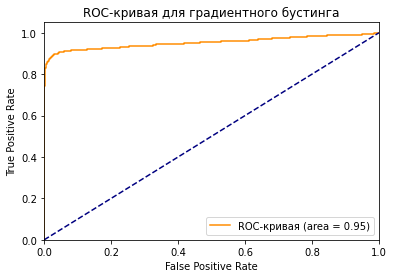

In [119]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для градиентного бустинга')
plt.legend(loc="lower right")
plt.show()

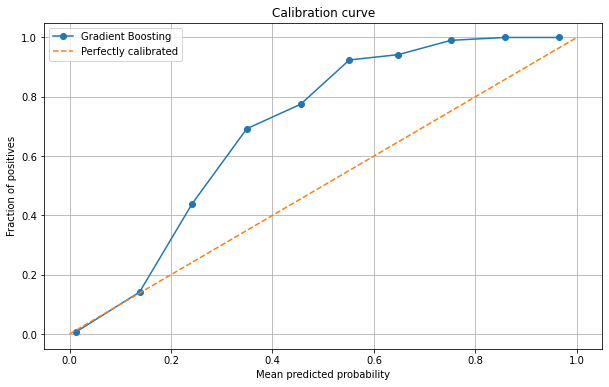

In [120]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

# Модель для кредитов (СМС)

In [121]:
train_df = pd.read_csv('marketing_optimization_data/credit_sms_train.csv')
test_df = pd.read_csv('marketing_optimization_data/credit_sms_oot.csv')

In [122]:
X_train, y_train = train_df.drop(['target'], axis=1), train_df['target']
X_test, y_test = test_df.drop(['target'], axis=1), test_df['target']

In [123]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19308
           1       0.94      0.30      0.46       692

    accuracy                           0.98     20000
   macro avg       0.96      0.65      0.72     20000
weighted avg       0.97      0.98      0.97     20000



In [124]:
roc_auc_score(y_test, y_probs := lr_model.predict_proba(X_test)[:, 1])

0.8351727727342946

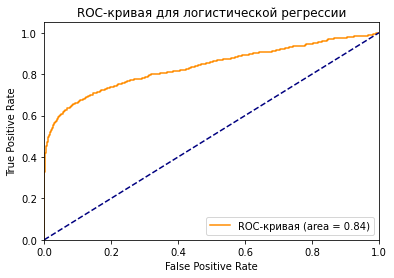

In [125]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.show()

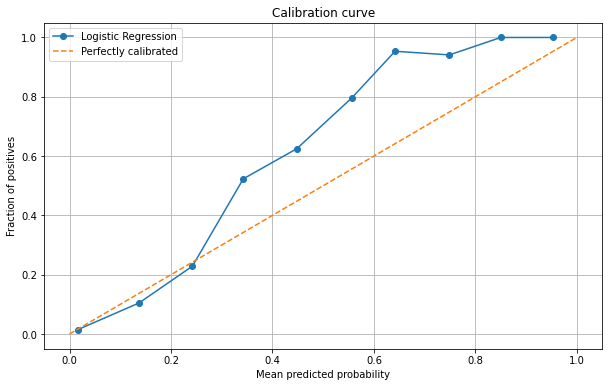

In [126]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [127]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19308
           1       1.00      0.13      0.24       692

    accuracy                           0.97     20000
   macro avg       0.98      0.57      0.61     20000
weighted avg       0.97      0.97      0.96     20000



In [128]:
roc_auc_score(y_test, y_probs := rf_model.predict_proba(X_test)[:, 1])

0.9154242573385976

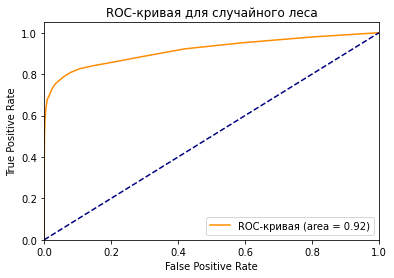

In [129]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для случайного леса')
plt.legend(loc="lower right")
plt.show()

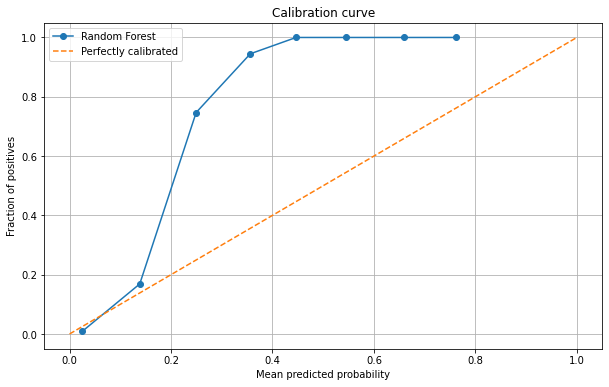

In [130]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()

In [131]:
catboost_model = CatBoostClassifier(task_type='GPU')
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)
catboost_model.fit(X_train, y_train, plot=True, plot_file='CatBoostRegressor.html', use_best_model=False)
print(classification_report(y_test, catboost_model.predict(X_test)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.026491
0:	learn: 0.6493330	total: 12.9ms	remaining: 12.9s
1:	learn: 0.6078071	total: 24.2ms	remaining: 12.1s
2:	learn: 0.5723404	total: 35.5ms	remaining: 11.8s
3:	learn: 0.5392144	total: 47.8ms	remaining: 11.9s
4:	learn: 0.5066705	total: 60.1ms	remaining: 12s
5:	learn: 0.4795337	total: 75.6ms	remaining: 12.5s
6:	learn: 0.4523841	total: 90.1ms	remaining: 12.8s
7:	learn: 0.4274278	total: 106ms	remaining: 13.1s
8:	learn: 0.4050508	total: 122ms	remaining: 13.4s
9:	learn: 0.3835485	total: 135ms	remaining: 13.4s
10:	learn: 0.3634792	total: 150ms	remaining: 13.5s
11:	learn: 0.3444433	total: 164ms	remaining: 13.5s
12:	learn: 0.3279805	total: 179ms	remaining: 13.6s
13:	learn: 0.3123239	total: 195ms	remaining: 13.7s
14:	learn: 0.2985922	total: 211ms	remaining: 13.8s
15:	learn: 0.2848182	total: 228ms	remaining: 14s
16:	learn: 0.2728571	total: 243ms	remaining: 14s
17:	learn: 0.2612276	total: 257ms	remaining: 14s
18:	learn: 0.2514079	total: 272ms	remaining: 14s
19:	learn: 0.2

163:	learn: 0.0832679	total: 2.49s	remaining: 12.7s
164:	learn: 0.0831077	total: 2.5s	remaining: 12.7s
165:	learn: 0.0829373	total: 2.52s	remaining: 12.7s
166:	learn: 0.0827262	total: 2.54s	remaining: 12.6s
167:	learn: 0.0824958	total: 2.55s	remaining: 12.6s
168:	learn: 0.0823908	total: 2.56s	remaining: 12.6s
169:	learn: 0.0821561	total: 2.58s	remaining: 12.6s
170:	learn: 0.0819998	total: 2.59s	remaining: 12.6s
171:	learn: 0.0818460	total: 2.6s	remaining: 12.5s
172:	learn: 0.0817096	total: 2.62s	remaining: 12.5s
173:	learn: 0.0815527	total: 2.63s	remaining: 12.5s
174:	learn: 0.0813956	total: 2.64s	remaining: 12.5s
175:	learn: 0.0812813	total: 2.66s	remaining: 12.4s
176:	learn: 0.0811425	total: 2.67s	remaining: 12.4s
177:	learn: 0.0809352	total: 2.68s	remaining: 12.4s
178:	learn: 0.0807547	total: 2.69s	remaining: 12.4s
179:	learn: 0.0806092	total: 2.71s	remaining: 12.3s
180:	learn: 0.0804185	total: 2.72s	remaining: 12.3s
181:	learn: 0.0802414	total: 2.73s	remaining: 12.3s
182:	learn: 0.

333:	learn: 0.0630547	total: 4.84s	remaining: 9.66s
334:	learn: 0.0629837	total: 4.86s	remaining: 9.65s
335:	learn: 0.0629029	total: 4.88s	remaining: 9.63s
336:	learn: 0.0628386	total: 4.89s	remaining: 9.62s
337:	learn: 0.0627506	total: 4.91s	remaining: 9.61s
338:	learn: 0.0626637	total: 4.92s	remaining: 9.6s
339:	learn: 0.0625929	total: 4.93s	remaining: 9.58s
340:	learn: 0.0625408	total: 4.95s	remaining: 9.57s
341:	learn: 0.0624223	total: 4.97s	remaining: 9.55s
342:	learn: 0.0623730	total: 4.98s	remaining: 9.54s
343:	learn: 0.0622719	total: 5s	remaining: 9.53s
344:	learn: 0.0621992	total: 5.01s	remaining: 9.52s
345:	learn: 0.0621423	total: 5.03s	remaining: 9.51s
346:	learn: 0.0620870	total: 5.04s	remaining: 9.49s
347:	learn: 0.0620249	total: 5.06s	remaining: 9.48s
348:	learn: 0.0619644	total: 5.08s	remaining: 9.47s
349:	learn: 0.0619022	total: 5.09s	remaining: 9.46s
350:	learn: 0.0618414	total: 5.11s	remaining: 9.45s
351:	learn: 0.0617740	total: 5.13s	remaining: 9.44s
352:	learn: 0.06

498:	learn: 0.0539827	total: 7.17s	remaining: 7.2s
499:	learn: 0.0539443	total: 7.18s	remaining: 7.18s
500:	learn: 0.0539200	total: 7.19s	remaining: 7.16s
501:	learn: 0.0538660	total: 7.21s	remaining: 7.15s
502:	learn: 0.0538062	total: 7.22s	remaining: 7.13s
503:	learn: 0.0537841	total: 7.24s	remaining: 7.12s
504:	learn: 0.0537115	total: 7.25s	remaining: 7.11s
505:	learn: 0.0536493	total: 7.27s	remaining: 7.1s
506:	learn: 0.0536270	total: 7.29s	remaining: 7.09s
507:	learn: 0.0535592	total: 7.3s	remaining: 7.07s
508:	learn: 0.0535066	total: 7.32s	remaining: 7.06s
509:	learn: 0.0534843	total: 7.33s	remaining: 7.04s
510:	learn: 0.0534305	total: 7.34s	remaining: 7.03s
511:	learn: 0.0534119	total: 7.36s	remaining: 7.01s
512:	learn: 0.0533669	total: 7.37s	remaining: 7s
513:	learn: 0.0533116	total: 7.39s	remaining: 6.99s
514:	learn: 0.0532644	total: 7.4s	remaining: 6.97s
515:	learn: 0.0532255	total: 7.42s	remaining: 6.96s
516:	learn: 0.0532151	total: 7.43s	remaining: 6.94s
517:	learn: 0.05316

668:	learn: 0.0486995	total: 9.46s	remaining: 4.68s
669:	learn: 0.0486836	total: 9.48s	remaining: 4.67s
670:	learn: 0.0486635	total: 9.49s	remaining: 4.65s
671:	learn: 0.0486295	total: 9.51s	remaining: 4.64s
672:	learn: 0.0486196	total: 9.52s	remaining: 4.63s
673:	learn: 0.0486026	total: 9.53s	remaining: 4.61s
674:	learn: 0.0485902	total: 9.55s	remaining: 4.6s
675:	learn: 0.0485643	total: 9.56s	remaining: 4.58s
676:	learn: 0.0485532	total: 9.57s	remaining: 4.57s
677:	learn: 0.0485414	total: 9.59s	remaining: 4.55s
678:	learn: 0.0485290	total: 9.6s	remaining: 4.54s
679:	learn: 0.0485202	total: 9.61s	remaining: 4.52s
680:	learn: 0.0485117	total: 9.62s	remaining: 4.51s
681:	learn: 0.0484933	total: 9.63s	remaining: 4.49s
682:	learn: 0.0484790	total: 9.64s	remaining: 4.48s
683:	learn: 0.0484480	total: 9.66s	remaining: 4.46s
684:	learn: 0.0484369	total: 9.67s	remaining: 4.45s
685:	learn: 0.0484204	total: 9.68s	remaining: 4.43s
686:	learn: 0.0484085	total: 9.69s	remaining: 4.42s
687:	learn: 0.

838:	learn: 0.0454183	total: 12s	remaining: 2.29s
839:	learn: 0.0454061	total: 12s	remaining: 2.28s
840:	learn: 0.0453914	total: 12s	remaining: 2.27s
841:	learn: 0.0453740	total: 12s	remaining: 2.25s
842:	learn: 0.0453235	total: 12s	remaining: 2.24s
843:	learn: 0.0453132	total: 12s	remaining: 2.22s
844:	learn: 0.0453038	total: 12.1s	remaining: 2.21s
845:	learn: 0.0452914	total: 12.1s	remaining: 2.2s
846:	learn: 0.0452798	total: 12.1s	remaining: 2.18s
847:	learn: 0.0452717	total: 12.1s	remaining: 2.17s
848:	learn: 0.0452586	total: 12.1s	remaining: 2.15s
849:	learn: 0.0452448	total: 12.1s	remaining: 2.14s
850:	learn: 0.0452276	total: 12.1s	remaining: 2.12s
851:	learn: 0.0452161	total: 12.1s	remaining: 2.11s
852:	learn: 0.0451890	total: 12.2s	remaining: 2.1s
853:	learn: 0.0451820	total: 12.2s	remaining: 2.08s
854:	learn: 0.0451673	total: 12.2s	remaining: 2.07s
855:	learn: 0.0451304	total: 12.2s	remaining: 2.05s
856:	learn: 0.0451181	total: 12.2s	remaining: 2.04s
857:	learn: 0.0451022	tota

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19308
           1       0.99      0.59      0.74       692

    accuracy                           0.99     20000
   macro avg       0.99      0.79      0.87     20000
weighted avg       0.99      0.99      0.98     20000



In [132]:
roc_auc_score(y_test, y_probs := catboost_model.predict_proba(X_test)[:, 1])

0.9326852896340551

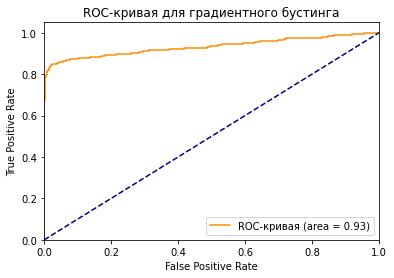

In [133]:
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для градиентного бустинга')
plt.legend(loc="lower right")
plt.show()

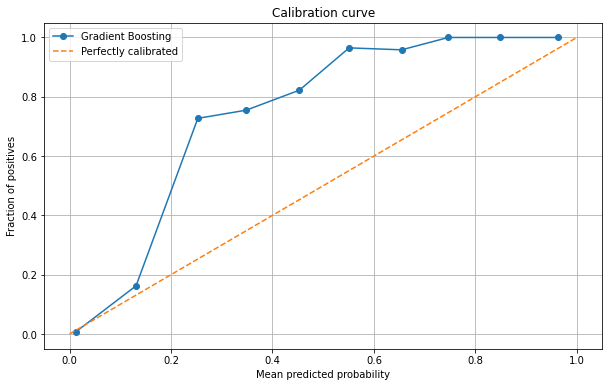

In [134]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.legend()
plt.grid()
plt.show()